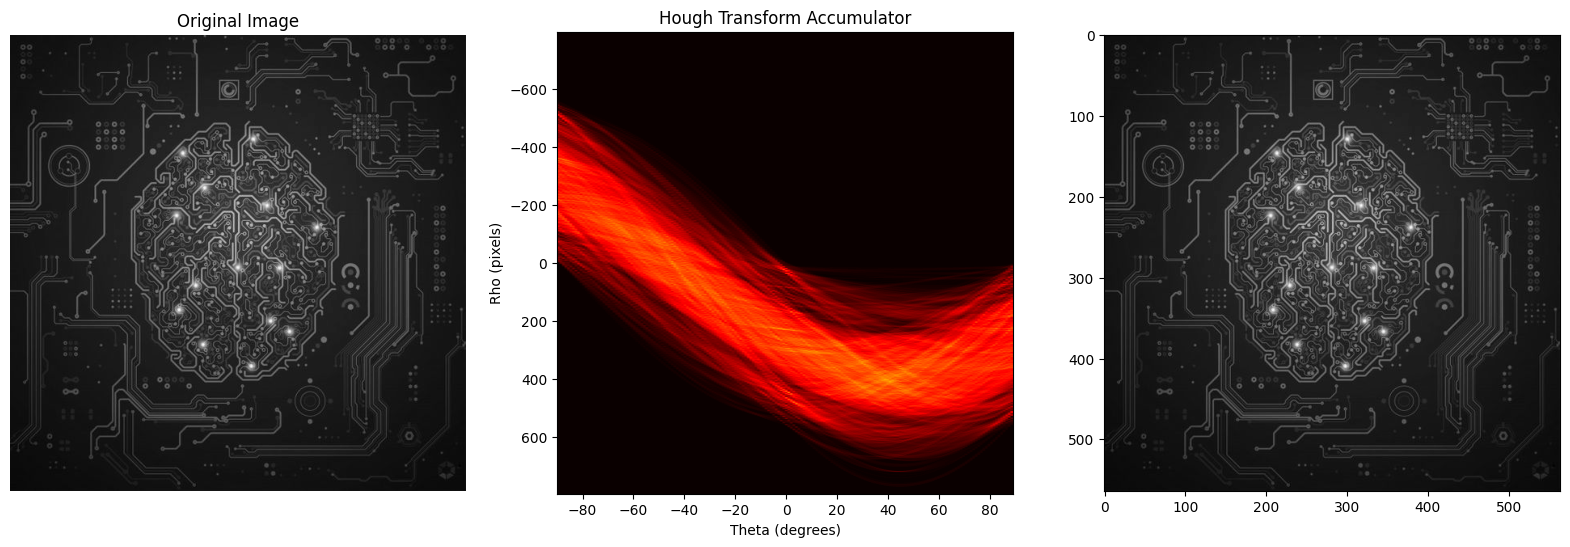

In [12]:
#sarinakasaiyan

import numpy as np
import matplotlib.pyplot as plt
import cv2  # For loading and processing images

def hough_line(img, rho_resolution=1, theta_resolution=1):
    """
    Perform Hough Transform to detect lines in a binary image.
    """
    thetas = np.deg2rad(np.arange(-90.0, 90.0, theta_resolution))
    width, height = img.shape
    diag_len = int(np.ceil(np.sqrt(width**2 + height**2)))
    rhos = np.arange(-diag_len, diag_len, rho_resolution)

    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)

    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img)

    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(len(thetas)):
            rho = x * cos_t[t_idx] + y * sin_t[t_idx]
            rho_idx = int((rho + diag_len) / rho_resolution)
            accumulator[rho_idx, t_idx] += 1

    return accumulator, thetas, rhos

# Load the image
image_path = '/content/hough_transform_image.jpg'  # Replace with your image file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image.")
else:
    # Apply Canny Edge Detection
    edges = cv2.Canny(image, 50, 150)

    # Apply Hough Transform
    accumulator, thetas, rhos = hough_line(edges)

    # Set up subplots for visualization
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    # Display Hough Space (Accumulator)
    im = ax[1].imshow(accumulator, cmap='hot', aspect='auto',
                      extent=[np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), rhos[-1], rhos[0]])
    ax[1].set_xlabel('Theta (degrees)')
    ax[1].set_ylabel('Rho (pixels)')
    ax[1].set_title('Hough Transform Accumulator')

    # Find peaks in the accumulator
    max_idx = np.unravel_index(np.argmax(accumulator), accumulator.shape)
    rho_peak = rhos[max_idx[0]]
    theta_peak = thetas[max_idx[1]]

    # Draw detected line on the original image
    ax[2].imshow(image, cmap='gray')

    x_vals = np.array([0, image.shape[1]])

    if np.sin(theta_peak) != 0:
        y_vals = (rho_peak - x_vals * np.cos(theta_peak)) / np.sin(theta_peak)
        ax[2].plot(x_vals, y_vals, 'r', label=f'Line: rho={rho_peak:.2f}, theta={np.rad2deg(theta_peak):.2f}°')

        ax[2].set_xlim([0, image.shape[1]])
        ax[2].set_ylim([image.shape[0], 0])
        ax[2].set_title("Detected Line")
        ax[2].legend()

        plt.tight_layout()
        plt.show()